### Importing required libraries

In [1]:
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams
from   datetime                        import  datetime,timedelta
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

### Reading time series data 

In [2]:
df= pd.read_csv('GDPUS.csv')
df.head()

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1


In [3]:
date = pd.date_range(start='01/01/1929', end='12/31/1991', freq='Y')

In [4]:
df['Year']=date
df=df.set_index('Year')
df.head()

,GDP
Year,
1929-12-31,821.8
1930-12-31,748.9
1931-12-31,691.3
1932-12-31,599.7
1933-12-31,587.1


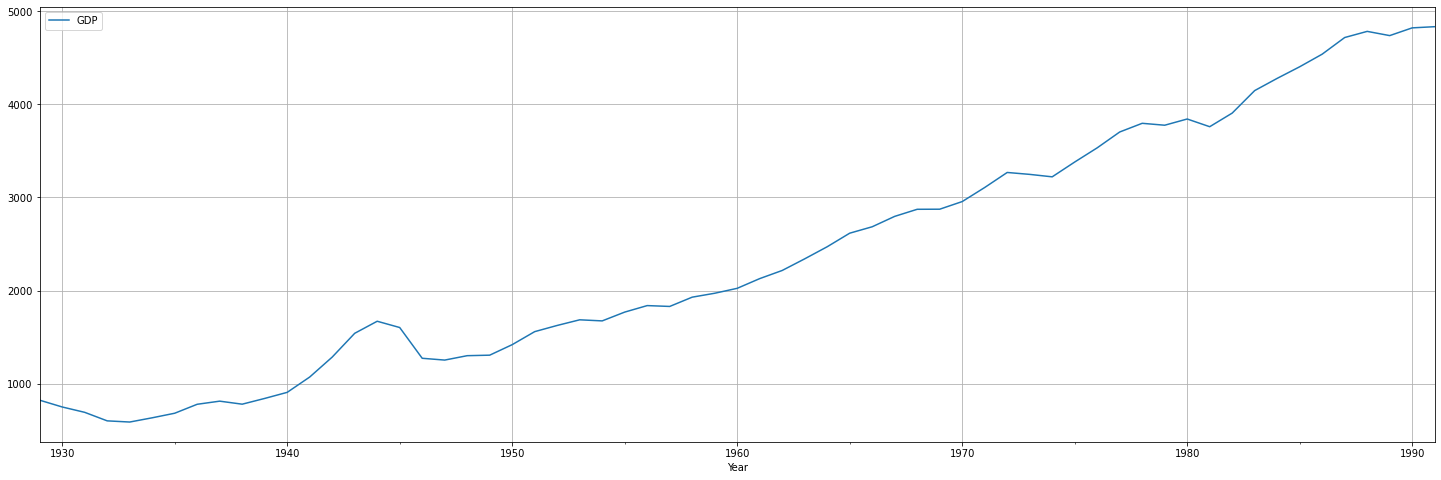

In [5]:
rcParams['figure.figsize'] = 25,8
df.plot(grid=True);

## Spliting time series data

### Most recent observations will be used to test the model while remaining series will be used to train the model

### if time series has seasonality, then test data must include atleast one seasonal period. 

In [6]:
train             = df[:55] 
test              = df[55:]

In [8]:
print('Train')
display(train)
print('Test')
display(test)

Train


,GDP
Year,
1929-12-31,821.8
1930-12-31,748.9
1931-12-31,691.3
1932-12-31,599.7
1933-12-31,587.1
1934-12-31,632.6
1935-12-31,681.6
1936-12-31,777.9
1937-12-31,811.4


Test


,GDP
Year,
1984-12-31,4279.8
1985-12-31,4404.5
1986-12-31,4539.9
1987-12-31,4718.6
1988-12-31,4784.6
1989-12-31,4739.2
1990-12-31,4822.3
1991-12-31,4835.0


# Simple Exponential Smoothing

In [14]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

In [15]:
model_SES_fit1 = model_SES.fit(smoothing_level=0.7,optimized=False)

In [16]:
model_SES_fit1.summary()

Dep. Variable:,GDP,No. Observations:,55
Model:,SimpleExpSmoothing,SSE,1102494.403
Optimized:,False,AIC,548.816
Trend:,None,BIC,552.831
Seasonal:,None,AICC,549.616
Seasonal Periods:,None,Date:,"Sun, 19 Sep 2021"
Box-Cox:,False,Time:,11:50:55
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.7000000,alpha,False
initial_level,687.26667,l.0,False


#### Predicting forecast using trained models

In [17]:
SES_predict1 = model_SES_fit1.forecast(steps=len(test))

#### Plotting time searies and forecasts 

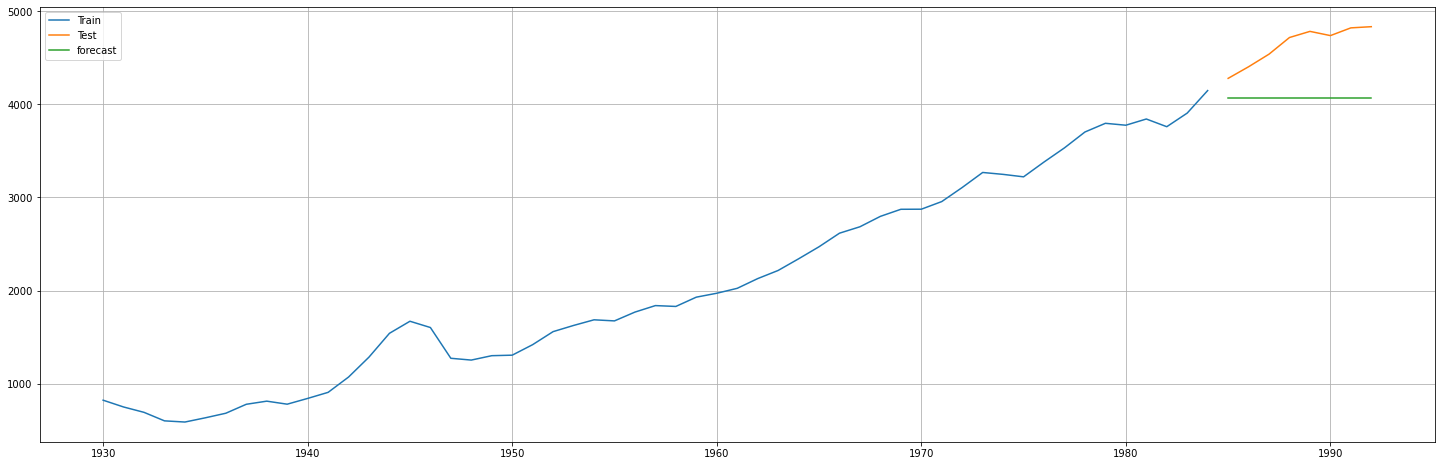

In [18]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict1,label='forecast')

plt.legend(loc='best')
plt.grid()

# Double Exponential Smoothing / Holt's linear Method

In [29]:
model_DES = Holt(train,exponential=False, initialization_method='estimated')

#### training the double exponential model

In [30]:
model_DES_fit1 = model_DES.fit(optimized=True)

In [31]:
model_DES_fit1.summary()

Dep. Variable:,GDP,No. Observations:,55
Model:,Holt,SSE,525466.736
Optimized:,True,AIC,512.059
Trend:,Additive,BIC,520.088
Seasonal:,None,AICC,513.809
Seasonal Periods:,None,Date:,"Sun, 19 Sep 2021"
Box-Cox:,False,Time:,11:59:12
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9956678,alpha,True
smoothing_trend,0.0950269,beta,True


#### Predicting forecast

In [32]:
DES_predict1 = model_DES_fit1.forecast(steps=len(test))

#### Lets plot the forecast

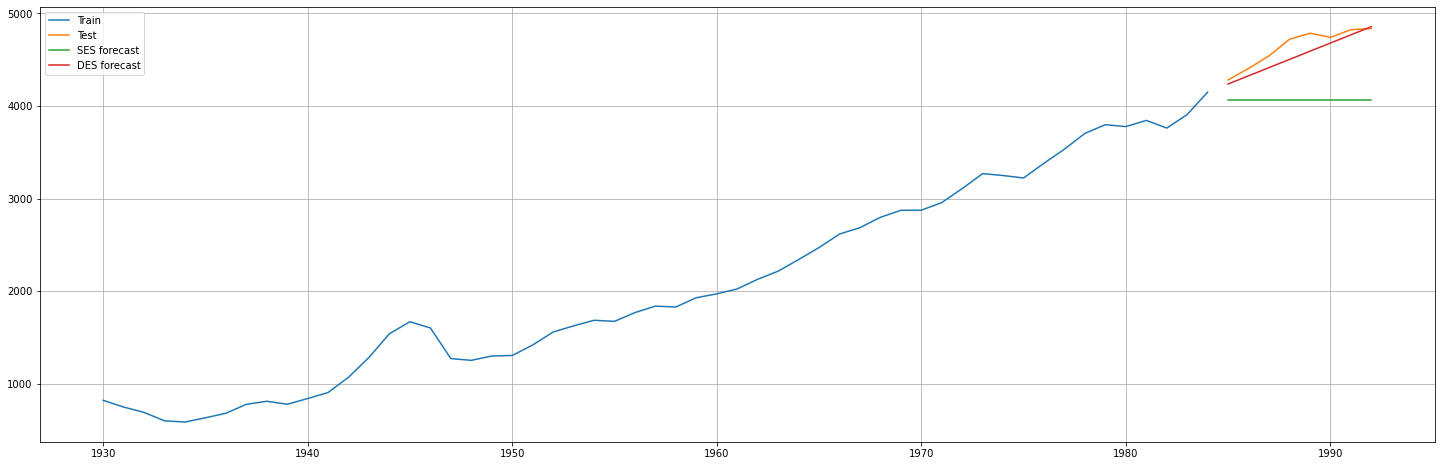

In [33]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict1,label='SES forecast')
plt.plot(DES_predict1, label='DES forecast')
plt.legend(loc='best')
plt.grid()

In [34]:
mean_squared_error(test.values,DES_predict1.values,squared=False)

120.90023221625026

#### Defining Mean Absolute Percentage error

In [35]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

#### Mean Absolute Percentage Error for simple forecasting model

In [36]:
MAPE(test.values,DES_predict1.values)

5.226951073747686

In [37]:
test['GDP'].values

array([4279.8, 4404.5, 4539.9, 4718.6, 4784.6, 4739.2, 4822.3, 4835. ])

In [38]:
DES_predict1.values

array([4236.13977861, 4324.51584409, 4412.89190956, 4501.26797504,
       4589.64404052, 4678.020106  , 4766.39617148, 4854.77223696])

# END